In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as interp
import pickle
import os

In [2]:
import pandas as pd

In [3]:
PROJECT_PATH = "../" 
PARAMS_PATH  = os.path.join(PROJECT_PATH,'params')

In [4]:
params = pickle.load(open(os.path.join(PARAMS_PATH,'parameter_search.pkl'),'rb'))

In [5]:
df_sample = pd.DataFrame.from_dict(params)

In [6]:

df_sample

,nvp_depth,num_nsf,num_nvp,scale,learningrate_1,batchsize_1,learningrate_2,batchsize_2,noise,nvp_vloss,nvp_tloss
0,10,2,6,3.000000,0.001,32,0.001,32,0.0,"[41.260605, 10.066386, 7.186516, 5.717168, 5.0...","[41.345036, 10.612366, 7.247125, 5.7136345, 5...."
1,10,2,6,3.000000,0.001,32,0.001,32,0.0,"[41.30405, 10.389313, 7.572486, 6.001169, 4.87...","[41.234703, 10.627622, 8.537779, 6.172237, 5.0..."
2,12,2,6,3.000000,0.001,32,0.001,32,0.0,"[42.21674, 9.9879265, 7.6411686, 6.060083, 4.9...","[42.16271, 9.447725, 8.087732, 6.747257, 4.626..."
3,14,2,6,3.000000,0.001,32,0.001,32,0.0,"[44.150192, 11.028439, 7.394204, 5.5833063, 4....","[44.595005, 11.108141, 6.841241, 6.193595, 5.2..."
4,16,2,6,3.000000,0.001,32,0.001,32,0.0,"[44.56536, 12.77162, 8.195772, 6.752875, 5.446...","[45.091446, 13.211507, 6.998194, 7.406371, 5.3..."
5,18,2,6,3.000000,0.001,32,0.001,32,0.0,"[44.985905, 11.872814, 7.7856345, 6.223984, 5....","[45.0316, 12.581241, 8.269566, 6.6953144, 4.91..."
6,20,2,6,3.000000,0.001,32,0.001,32,0.0,"[44.389874, 12.035918, 8.287207, 6.8257265, 5....","[44.08026, 12.177138, 8.172464, 6.976506, 5.08..."
7,24,2,6,3.000000,0.001,32,0.001,32,0.0,"[47.820354, 15.173497, 10.008909, 7.8011947, 5...","[48.044155, 15.786709, 10.328908, 8.061168, 5...."
8,10,4,6,3.000000,0.001,32,0.001,32,0.0,"[42.05926, 11.624583, 8.078511, 6.5066123, 5.2...","[42.086555, 11.307315, 8.814466, 6.461845, 5.4..."
9,10,4,6,5.000000,0.001,32,0.001,32,0.0,"[41.021095, 10.197539, 7.2680907, 5.63928, 4.8...","[41.186325, 10.500552, 7.229793, 5.7230606, 5...."


In [7]:
df_sample['final_err'] = np.zeros(20)
df_sample['min_err'] = np.zeros(20)
df_sample['final_deriv'] = np.zeros(20)
df_sample['avg_deriv'] = np.zeros(20)

ValueError: Length of values does not match length of index

In [17]:
df = df_sample

In [28]:
df['nvp_vloss'][19].shape

(150,)

(-5, 0)

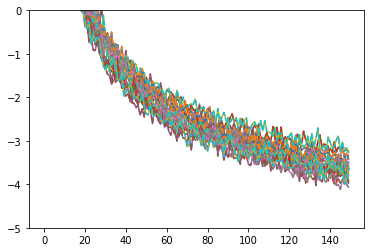

In [35]:
# use minimum between minimum and curent value+mean(deriv)*delta_step (delta_step=50000)?
for ii in range(20):
    num    = len(df['nvp_vloss'][ii])
    #print(num)
    splrep = interp.splrep(np.arange(num), df['nvp_vloss'][ii])
    plt.plot(np.arange(num),interp.splev(np.arange(num),splrep))
    plt.plot(np.arange(num),df['nvp_vloss'][ii],ls='--', marker='',label='%d'%ii)
    deriv   = interp.splev(np.arange(num),splrep,der=1)
    minimum = min(interp.splev(np.arange(num),splrep))
    df_sample.at[ii,'final_err']   = interp.splev(np.arange(num),splrep)[num-1]
    df_sample.at[ii,'min_err']     = minimum
    df_sample.at[ii,'final_deriv'] = deriv[num-1]
    df_sample.at[ii,'avg_deriv']   = np.mean(deriv[num-20:num-1])
    #plt.axvline(num-10000)
#plt.legend(loc='upper right')
plt.ylim(-5,0)

In [18]:
regressor = df_sample[0:14]

In [36]:
regressor = df_sample

In [37]:
df.columns

Index(['nvp_depth', 'num_nsf', 'num_nvp', 'scale', 'learningrate_1',
       'batchsize_1', 'learningrate_2', 'batchsize_2', 'noise', 'nvp_vloss',
       'nvp_tloss', 'final_err', 'min_err', 'final_deriv', 'avg_deriv'],
      dtype='object')

In [66]:
x = regressor[['nvp_depth', 'num_nsf', 'num_nvp']]#, 'final_err','min_err', 'final_deriv', 'avg_deriv']]

In [67]:
x = x.to_numpy()

In [68]:
x

array([[10,  2,  6],
       [10,  2,  6],
       [12,  2,  6],
       [14,  2,  6],
       [16,  2,  6],
       [18,  2,  6],
       [20,  2,  6],
       [24,  2,  6],
       [10,  4,  6],
       [10,  4,  6],
       [12,  4,  6],
       [14,  4,  6],
       [16,  4,  6],
       [18,  4,  6],
       [20,  4,  6],
       [10,  2,  8],
       [12,  2, 10],
       [14,  2, 10],
       [16,  2, 10],
       [18,  2, 10]])

In [23]:
x[np.where(x==0)]=1e-9

In [69]:
x = np.log(x)

In [70]:
x

array([[2.30258509, 0.69314718, 1.79175947],
       [2.30258509, 0.69314718, 1.79175947],
       [2.48490665, 0.69314718, 1.79175947],
       [2.63905733, 0.69314718, 1.79175947],
       [2.77258872, 0.69314718, 1.79175947],
       [2.89037176, 0.69314718, 1.79175947],
       [2.99573227, 0.69314718, 1.79175947],
       [3.17805383, 0.69314718, 1.79175947],
       [2.30258509, 1.38629436, 1.79175947],
       [2.30258509, 1.38629436, 1.79175947],
       [2.48490665, 1.38629436, 1.79175947],
       [2.63905733, 1.38629436, 1.79175947],
       [2.77258872, 1.38629436, 1.79175947],
       [2.89037176, 1.38629436, 1.79175947],
       [2.99573227, 1.38629436, 1.79175947],
       [2.30258509, 0.69314718, 2.07944154],
       [2.48490665, 0.69314718, 2.30258509],
       [2.63905733, 0.69314718, 2.30258509],
       [2.77258872, 0.69314718, 2.30258509],
       [2.89037176, 0.69314718, 2.30258509]])

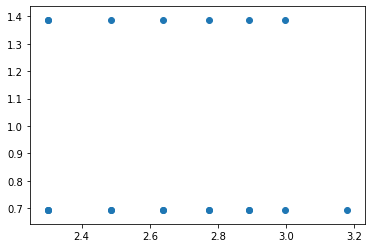

In [91]:
plt.scatter(x[:,0],x[:,1])#,c=y)

In [102]:
y = #, 'final_err','min_err', 'final_deriv', 'avg_deriv']]

In [73]:
y = regressor[['final_err']].to_numpy()+100*regressor[['avg_deriv']].to_numpy()

In [74]:
#y = np.log(y)
y

array([[-5.31467123],
       [-3.60981277],
       [-5.0868982 ],
       [-5.02589762],
       [-5.95356749],
       [-5.27107164],
       [-3.9524918 ],
       [-5.70055197],
       [-4.42522104],
       [-3.60448373],
       [-3.93999609],
       [-4.40886299],
       [-3.98456301],
       [-5.40448472],
       [-6.65872887],
       [-2.22931925],
       [-3.81245158],
       [-4.64879173],
       [-5.38714232],
       [-2.83054982]])

In [85]:

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-3, 1e3))
#Instanciate a Gaussian Process model
gp     = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)
print(gp)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=100, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)


In [86]:
# fit on averages of full rescaled set
gp.fit(x,y)

/global/homes/v/vboehm/.conda/envs/tf22/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=100, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [87]:
gp.predict([[2.30258509, 0.69314718, 1.79175947, 1.09861229]])

ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

In [135]:
np.hstack(([[40]],[[1,2,3]]))

array([[40,  1,  2,  3]])

In [59]:
from scipy.optimize import minimize

In [63]:
res = minimize(fun= lambda x: gp.predict([x]), x0=[1,1,1,1], method='Nelder-Mead')

In [64]:
np.exp(res['x']), res['fun'], res['success']

(array([2.71828183, 2.71828183, 2.71828183, 2.71828183]), 0.0, True)

In [65]:
np.exp(res['x']), res['fun'], res['success']

(array([2.71828183, 2.71828183, 2.71828183, 2.71828183]), 0.0, True)

In [149]:
res = minimize(fun= lambda x: gp.predict(np.hstack(([[np.log(40)]],[x]))), x0=np.log([1e-3, 32, 0.4, 20]), method='COBYLA')

In [150]:
np.exp(res['x']), res['fun'], res['success']

(array([1.22798998e-03, 2.98710315e+02, 1.50212482e-01, 9.24223058e+01]),
 -2.8107036995835846,
 True)

In [156]:
res = minimize(fun= lambda x: gp.predict(np.hstack(([[np.log(40)]],[x]))), x0=np.log([1e-03, 256,0.15, 10]), method='Nelder-Mead')

In [157]:
np.exp(res['x']), res['fun'], res['success']

(array([1.22790087e-03, 2.98721317e+02, 1.50215902e-01, 9.24118914e+01]),
 -2.8107037024981048,
 True)